# Practical 2

**Topic** : SpaCy and NER

**Granularity**


1.   Introduction to SpaCy
2.   SpaCy Capabilities
3.   NER and Viz
4.   Sentence Segmentation


# Section 1 - Introduction to SpaCy

SpaCy is a free open-source library for Natural Language Processing in Python. It features NER, POS tagging, dependency parsing, word vectors and more.

First we install the library.

## Installation

In [1]:
!pip install spacy

## Library Loading
Understand that SpaCy is a fairly large library, so if may take a while to load.

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

## Creation of a Document Object

In [3]:
doc = nlp(u'Mahindra is looking at buying an Indian startup for $4 crores.')

Let us see each of the tokens from the document separately.

In [4]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

Mahindra PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
an DET det
Indian ADJ amod
startup NOUN dobj
for ADP prep
$ SYM nmod
4 NUM nummod
crores NOUN pobj
. PUNCT punct


As we dive deeper into spaCy we'll see what each of these abbreviations mean and how they're derived. We'll also see how spaCy can interpret the last three tokens combined $4 crores as referring to money.

## SpaCy Objects

After importing the spacy module in the cell above we loaded a **model** and named it `nlp`.
Next we created a **Doc** object by applying the model to our text, and named it `doc`.
spaCy also builds a companion **Vocab** object that we'll cover in later sections.
The Doc object that holds the processed text is our focus here.

## Pipeline

When we run `nlp`, our text enters a processing pipeline that first breaks down the text and then performs a series of operations to tag, parse and describe the data.

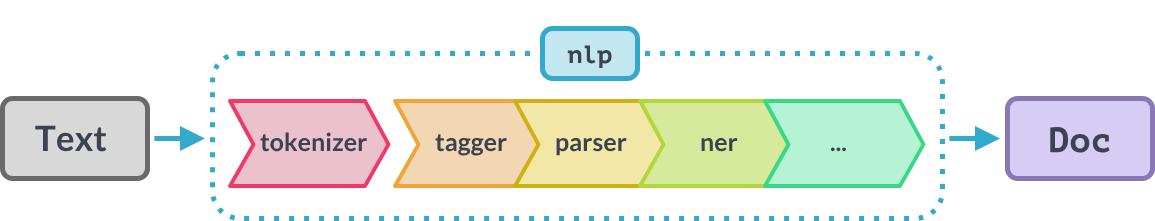

We can check to see what components currently live in the pipeline. In later sections we'll learn how to disable components and add new ones as needed.

In [5]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7bd0b5850dc0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7bd0b5850160>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7bd0b59dceb0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7bd0b56b1440>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7bd0b58787c0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7bd0b59dd000>)]

In [6]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

## Dependencies

We also looked at the syntactic dependencies assigned to each token. Tesla is identified as an nsubj or the nominal subject of the sentence.

For a full list of Syntactic Dependencies visit https://spacy.io/api/annotation#dependency-parsing

In [8]:
doc2 = nlp(u"Reliance isn't looking into startups anymore.")

In [9]:
doc2[0].dep_

'nsubj'

In [10]:
spacy.explain('nsubj')

'nominal subject'

In [11]:
spacy.explain('PROPN')

'proper noun'

---

# Section 2 : SpaCy Capabilities

##Additional Token Attributes

For now can take a look at some of the other information that spaCy assigns to tokens:

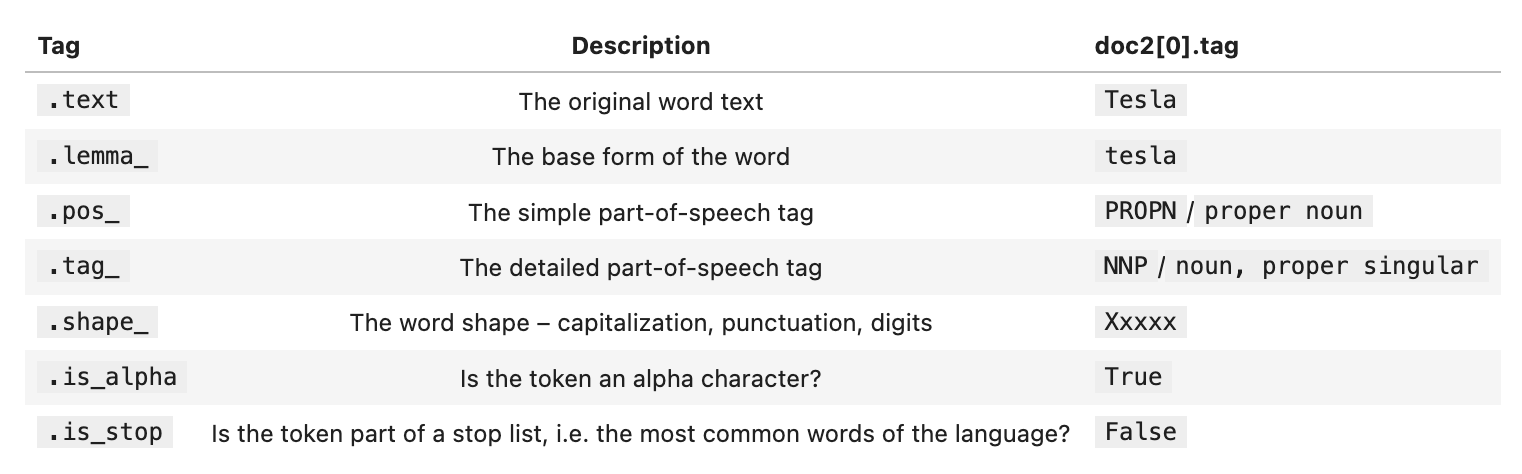

## Lemmatization

In [12]:
print(doc2[3].text)
print(doc2[3].lemma_)

looking
look


## Simple POS Tagging

In [13]:
print(doc2[3].pos_)
print(doc2[3].tag_ + ' / ' + spacy.explain(doc2[4].tag_))

VERB
VBG / conjunction, subordinating or preposition


## Word Shapes

In [14]:
print(doc2[0].text+': '+ doc2[0].shape_)
print(doc[2].text+' : '+ doc[5].shape_)

Reliance: Xxxxx
looking : xx


## Boolean Values

In [15]:
print(doc2[0])
print(doc2[0].is_alpha)
print(doc2[0].is_stop)

print('----')

print(doc2[7])
print(doc2[7].is_alpha)
print(doc2[7].is_stop)
print(doc2[7].is_punct)

Reliance
True
False
----
.
False
False
True


## Spans

Large Doc objects can be hard to work with at times. A span is a slice of Doc object in the form `Doc[start:stop]`.

In [16]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [17]:
life_quote = doc3[16:30]
print(life_quote)

"Life is what happens to us while we are making other plans"


In [18]:
type(life_quote)

spacy.tokens.span.Span

## Vocabulary and matching

So far we've seen how a body of text is divided into tokens, and how individual tokens are parsed and tagged with parts of speech, dependencies and lemmas.

In this section we will identify and label specific phrases that match patterns we can define ourselves.

### Rule-based Matching
**`spaCy`** offers a rule-matching tool called **`Matcher`** that allows you to build a library of token patterns, then match those patterns against a Doc object to return a list of found matches. You can match on any part of the token including text and annotations, and you can add multiple patterns to the same matcher.

In [19]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

In [20]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
pattern = [{"LIKE_EMAIL": True}]
matcher.add("EMAIL_ADDRESS", [pattern])
doc = nlp("This is an email address: wmattingly@aol.com")
matches = matcher(doc)
print(matches)

[(16571425990740197027, 6, 7)]


[Lexemes , start token, end token]

In [21]:
pattern = [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]
matcher.add("HelloWorld", [pattern])

doc = nlp("Hello, world! Hello world!")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

15578876784678163569 HelloWorld 0 3 Hello, world


### Creating patterns

In literature, the phrase 'stock market' might appear as one word or two, with or without a hyphen. In this section we'll develop a matcher named 'StockMarket' that finds all three:

In [22]:
patterns = [[{'LOWER': 'stockmarket'}], [{'LOWER': 'stock'}, {'LOWER': 'market'}],[{'LOWER': 'stock'}, {'IS_PUNCT': True}, {'LOWER': 'market'}]]

matcher.add('StockMarket', patterns)

matches = matcher(doc)

### Applying the matcher to a Doc object

In [23]:
doc = nlp(u'The Stock Market continues to remain volatile \
as of today afternoon. Stock-market experts speculate corrections this week.')

In [24]:
found_matches = matcher(doc)
print(found_matches)

[(13134578447604137447, 1, 3), (13134578447604137447, 12, 15)]


In [25]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

13134578447604137447 StockMarket 1 3 Stock Market
13134578447604137447 StockMarket 12 15 Stock-market


**Note** - The match_id is simply the hash value of the string_ID `StockMarket`

## Phrase Matcher

In the above section we used token patterns to perform rule-based matching. An alternative - and often more efficient - method is to match on terminology lists. In this case we use PhraseMatcher to create a Doc object from a list of phrases, and pass that into **`matcher`** instead.

In [26]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [27]:
doc3 = nlp(u'''I say to you today, my friends, so even though we face the difficulties of
          today and tomorrow, I still have a dream. It is a dream deeply rooted in
          the American dream. I have a dream that one day this nation will rise up
          and live out the true meaning of its creed, \'We hold these truths to be
          self-evident, that all men are created equal\''''
          )

First, create a list of match phrases

In [28]:
phrase_list = ['dream', 'creed', 'nation']


Convert each phrase to a Doc object

In [29]:
phrase_patterns = [nlp(text) for text in phrase_list]

Pass each Doc object into matcher (note the use of asterisk)

In [30]:
matcher.add('Dream', None, *phrase_patterns)

Populate a list of matches

In [31]:
matches = matcher(doc3)

(match_id, start, end)

In [32]:
matches

[(7300076498446741175, 26, 27),
 (7300076498446741175, 31, 32),
 (7300076498446741175, 38, 39),
 (7300076498446741175, 43, 44),
 (7300076498446741175, 48, 49),
 (7300076498446741175, 61, 62)]

In [32]:
doc3[:40]

I say to you today, my friends, so even though we face the difficulties of
          today and tomorrow, I still have a dream. It is a dream deeply rooted in
          the American dream.

---

# Section 3 : NER and Viz

**`spaCy`** has an 'ner' pipeline component that identifies token spans fitting a predetermined set of named entities. These are available as the ents property of a Doc object.

 A Function to display basic entity info.

In [33]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')

In [34]:
doc = nlp(u'May I go to Delhi, next May to see the Red Fort?')

show_ents(doc)

Delhi - GPE - Countries, cities, states
next May - DATE - Absolute or relative dates or periods
the Red Fort - LOC - Non-GPE locations, mountain ranges, bodies of water


## Entity annotations

**`Doc.ents`** are token spans with their own set of annotations.

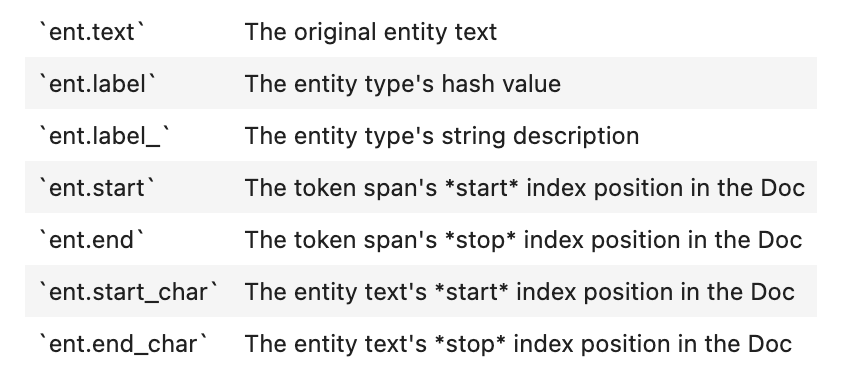

In [35]:
doc = nlp(u'Can I please borrow 5000 rupees from you to buy some Apple stock?')

for ent in doc.ents:
    print(ent.text, ent.start, ent.end, ent.start_char, ent.end_char, ent.label_)

5000 4 5 20 24 CARDINAL
Apple 11 12 53 58 ORG


**NER Tags**

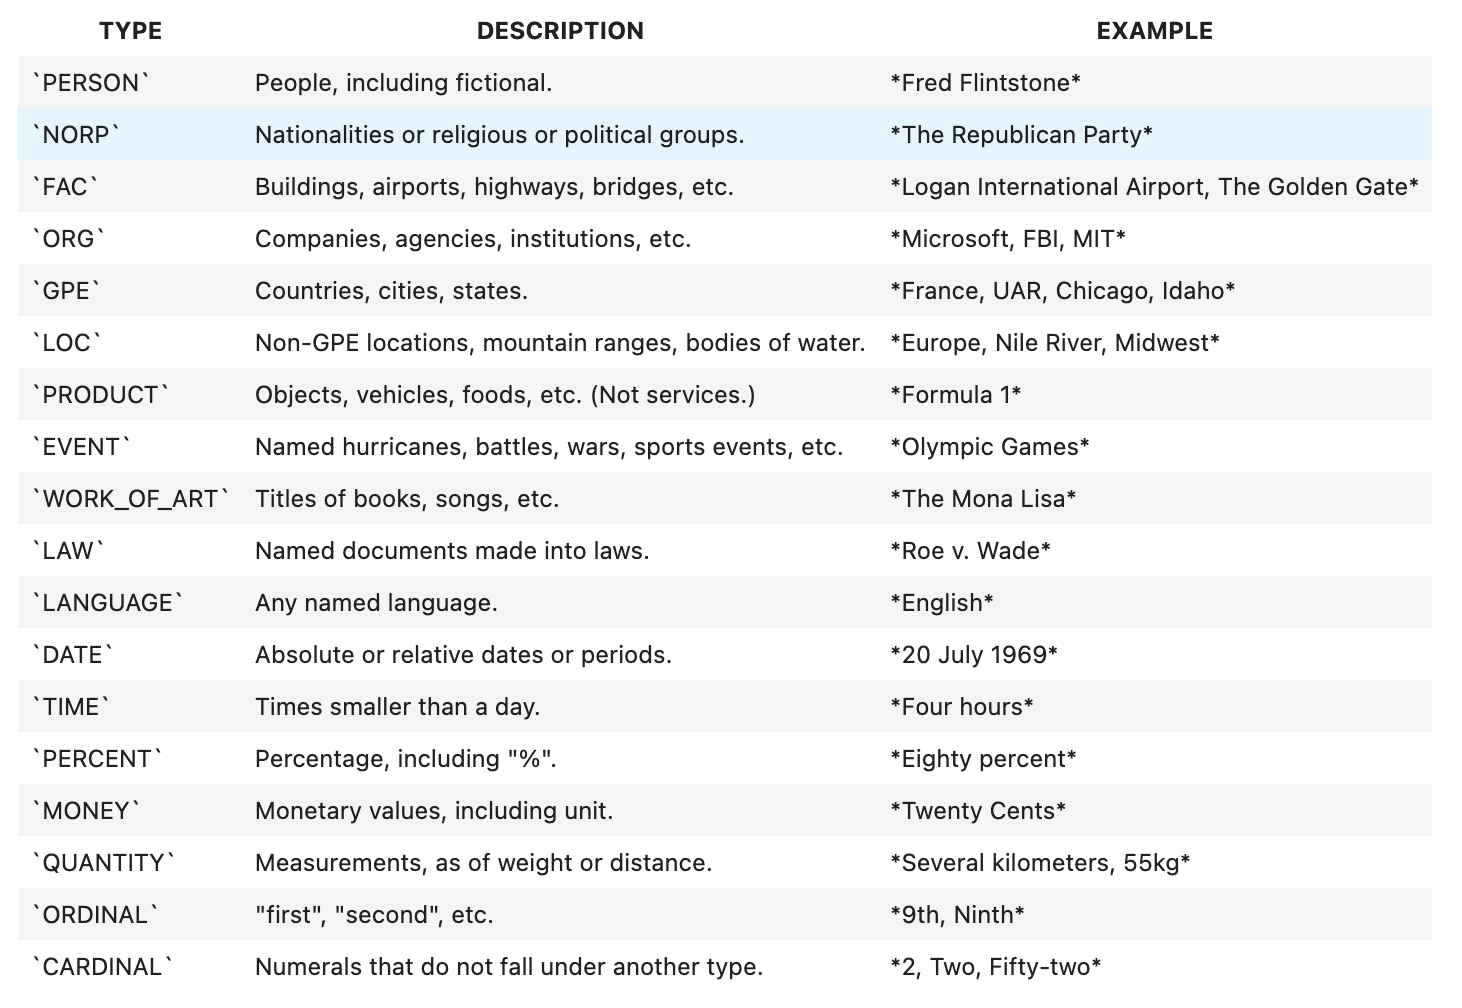


## Adding Named Entities to a Span

Normally we would have spaCy build a library of named entities by training it on several samples of text.

In this case, we only want to add one value:

In [36]:
doc = nlp(u'Tesla to build a U.K. factory for $6 million')

show_ents(doc)

U.K. - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


Right now, spaCy does not recognize "Tesla" as a company.

In [37]:
from spacy.tokens import Span

Get the hash value of the ORG entity label

In [38]:
ORG = doc.vocab.strings[u'ORG']

Create a Span for the new entity

In [39]:
new_ent = Span(doc, 0, 1, label=ORG)

Add the entity to the existing Doc object

In [40]:
doc.ents = list(doc.ents) + [new_ent]

In the code above, the arguments passed to `Span()` are:

`doc` - the name of the Doc object

`0` - the start index position of the span

`1` - the stop index position (exclusive)

`label`=ORG - the label assigned to our entity

In [41]:
show_ents(doc)

Tesla - ORG - Companies, agencies, institutions, etc.
U.K. - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


## Adding Named Entities to All Matching Spans

In [42]:
doc = nlp(u'Our company plans to introduce a new vacuum cleaner. '
          u'If successful, the vacuum cleaner will be our first product.')

show_ents(doc)

first - ORDINAL - "first", "second", etc.


In [43]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [44]:
phrase_list = ['vacuum cleaner', 'vacuum-cleaner']
phrase_patterns = [nlp(text) for text in phrase_list]

Apply the patterns to our matcher object

In [45]:
matcher.add('newproduct', None, *phrase_patterns)

Apply the matcher to our Doc object

In [46]:
matches = matcher(doc)

See what matches occur

In [47]:
matches

[(2689272359382549672, 7, 9), (2689272359382549672, 14, 16)]

Here we create Spans from each match, and create named entities from them

In [48]:
from spacy.tokens import Span

PROD = doc.vocab.strings[u'PRODUCT']

new_ents = [Span(doc, match[1],match[2],label=PROD) for match in matches]

doc.ents = list(doc.ents) + new_ents

In [49]:
show_ents(doc)

vacuum cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)
vacuum cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)
first - ORDINAL - "first", "second", etc.


## Counting Entities

While spaCy may not have a built-in tool for counting entities, we can pass a conditional statement into a list comprehension:

In [50]:
doc = nlp(u'Originally priced at $29.50, the sweater was marked down to five dollars.')

show_ents(doc)

29.50 - MONEY - Monetary values, including unit
five dollars - MONEY - Monetary values, including unit


In [51]:
len([ent for ent in doc.ents if ent.label_=='MONEY'])

2

## Visualizing NER

Besides viewing Part of Speech dependencies with style='dep', **`displaCy`** offers a style='ent' visualizer:

In [52]:
from spacy import displacy

In [53]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million. '
         u'By contrast, Sony sold only 7 thousand Walkman music players.')

displacy.render(doc, style='ent', jupyter=True)

## Viewing only specific Entities

In [54]:
options = {'ents': ['ORG', 'PRODUCT']}

displacy.render(doc, style='ent', jupyter=True, options=options)

## Customizing Colors and Effects

You can also pass background color and gradient options:

In [55]:
colors = {'ORG': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', 'PRODUCT': 'radial-gradient(yellow, green)'}

options = {'ents': ['ORG', 'PRODUCT'], 'colors':colors}

displacy.render(doc, style='ent', jupyter=True, options=options)

## External Rendering

In [56]:
#displacy.serve(doc, style='ent', options=options)

---

# Section 4 : Sentence Segmentation

In spaCy Introduction section we saw briefly how Doc objects are divided into sentences. In this section we'll learn how sentence segmentation works, and how to set our own segmentation rules.

In [56]:
doc = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

for sent in doc.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


### `Doc.sents` is a generator

It is important to note that `doc.sents` is a generator. That is, a Doc is not segmented until `doc.sents` is called. This means that, where you could print the second Doc token with `print(doc[1])`, you can't call the "second Doc sentence" with `print(doc.sents[1])`:

In [57]:
print(doc[1])

is


In [58]:
print(doc.sents[1])

TypeError: ignored

In [59]:
doc_sents = [sent for sent in doc.sents]
doc_sents

[This is the first sentence.,
 This is another sentence.,
 This is the last sentence.]

Here's how you can access individual sentences

In [60]:
print(doc_sents[1])

This is another sentence.


### `sents` are Spans

At first glance it looks like each sent contains text from the original Doc object. In fact they're just Spans with start and end token pointers.

In [61]:
type(doc_sents[1])

spacy.tokens.span.Span

In [62]:
print(doc_sents[1].start, doc_sents[1].end)

6 11


---